# Data Cleaning and Exploration of the FIFA 21 Player dataset

### **Goal**

#### To clean and transform this dataset, then find players that are valuable but underpaid

In [752]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('classic')

In [753]:
data = pd.read_csv("fifa21 raw data v2.csv")

C:\Users\USER\AppData\Local\Temp\ipykernel_24372\2806316578.py:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("fifa21 raw data v2.csv")


Cleaning this dataset will focus on making sure:
- Each column has appropriate data types
- Separate columns that can be broken down
- Tranforming data to more suitable features
- Transforming incompatible object types

In [754]:
data = data.drop_duplicates()

In [755]:
data.iloc[:, 76]

0        771
1        562
2        150
3        207
4        595
        ... 
18974    NaN
18975    NaN
18976    NaN
18977    NaN
18978    NaN
Name: Hits, Length: 18979, dtype: object


**Data Cleaning and Preparation:**

1. **Handled Missing Values:** Replaced missing values in the "Hits" column with the mean of the non-missing values.
2. **Normalized Numeric Values:** Converted string representations of numeric values (e.g., "1.6K") to their integer equivalents (e.g., 1600).
3. **Standardized Data Type:** Ensured data consistency by converting the entire "Hits" column to an integer data type.


In [756]:
data["Hits"].isnull().value_counts()

Hits
False    16384
True      2595
Name: count, dtype: int64

In [757]:
data[data["Hits"].isna() == True]

,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,...,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
16203,209528,D. O'Reilly,Daniel O'Reilly,https://cdn.sofifa.com/players/209/528/21_60.png,http://sofifa.com/player/209528/daniel-oreilly...,Republic of Ireland,25,58,62,\n\n\n\nShelbourne FC,...,Medium,Medium,1 ★,52,43,49,50,55,68,NaN
16204,243064,Park Tae Jun,Tae Jun Park,https://cdn.sofifa.com/players/243/064/21_60.png,http://sofifa.com/player/243064/tae-jun-park/2...,Korea Republic,21,58,70,\n\n\n\nSeongnam FC,...,High,High,1 ★,63,48,58,59,41,63,NaN
16205,216441,D. Bozic,Dejan Bozic,https://cdn.sofifa.com/players/216/441/21_60.png,http://sofifa.com/player/216441/dejan-bozic/21...,Germany,27,58,59,\n\n\n\nSV Meppen,...,Medium,Medium,1 ★,61,58,45,50,21,69,NaN
16206,254841,K. Kurokawa,Keisuke Kurokawa,https://cdn.sofifa.com/players/254/841/21_60.png,http://sofifa.com/player/254841/keisuke-kuroka...,Japan,23,58,64,\n\n\n\nGamba Osaka,...,Medium,Medium,1 ★,70,31,47,51,55,63,NaN
16208,257657,D. Bashlay,Dmytro Bashlay,https://cdn.sofifa.com/players/257/657/21_60.png,http://sofifa.com/player/257657/dmytro-bashlay...,Ukraine,30,58,58,\n\n\n\nPodbeskidzie Bielsko-Biała,...,Medium,Medium,1 ★,63,25,35,39,57,65,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,247223,Xia Ao,Ao Xia,https://cdn.sofifa.com/players/247/223/21_60.png,http://sofifa.com/player/247223/ao-xia/210006/,China PR,21,47,55,\n\n\n\nWuhan Zall,...,Medium,Medium,1 ★,64,28,26,38,48,51,NaN
18975,258760,B. Hough,Ben Hough,https://cdn.sofifa.com/players/258/760/21_60.png,http://sofifa.com/player/258760/ben-hough/210006/,England,17,47,67,\n\n\n\nOldham Athletic,...,Medium,Medium,1 ★,64,40,48,49,35,45,NaN
18976,252757,R. McKinley,Ronan McKinley,https://cdn.sofifa.com/players/252/757/21_60.png,http://sofifa.com/player/252757/ronan-mckinley...,England,18,47,65,\n\n\n\nDerry City,...,Medium,Medium,1 ★,63,39,44,46,40,53,NaN
18977,243790,Wang Zhen'ao,Zhen'ao Wang,https://cdn.sofifa.com/players/243/790/21_60.png,http://sofifa.com/player/243790/zhenao-wang/21...,China PR,20,47,57,\n\n\n\nDalian YiFang FC,...,Medium,Medium,1 ★,58,49,41,49,30,44,NaN


In [758]:
# Filter out missing values and "K" values
filtered_hits = data["Hits"][~data["Hits"].isna() & ~data["Hits"].astype(str).str.contains("K")]

# Convert filtered values to integers
integer_hits = filtered_hits.astype(int)

# Calculate the mean of integer values
mean_hits = integer_hits.mean()

print("Mean of filtered hits:", mean_hits)

Mean of filtered hits: 22.824406945463437


In [759]:
# Filled all missing values with the mean value.
data["Hits"] = data["Hits"].fillna(23.1)

In [760]:
import re

def convert_rating(rating):
    if isinstance(rating, str):
        match = re.match(r"(\d+(\.\d+)?)K", rating)
        if match:
            num, _ = match.groups()
            return int(float(num) * 1000)
    return rating

data["Hits"] = data["Hits"].apply(convert_rating)
data["Hits"] = data["Hits"].astype(int)

In [761]:
data["Hits"].max()

8400

<Axes: >

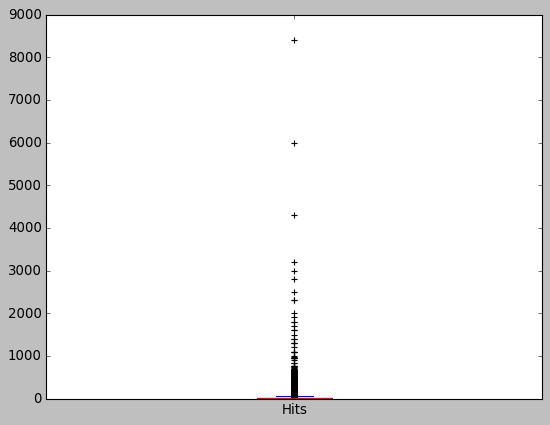

In [762]:
data["Hits"].plot(kind="box")

**Data Cleaning and Standardization**

The `Height` and `Weight` columns contained values in various units (cm, ft-in, kg, lbs). To ensure consistency and facilitate analysis, the following steps were taken:

1. **Unit Conversion:**
   - **Height:** Values in feet and inches were converted to centimeters.
   - **Weight:** Values in pounds were converted to kilograms.
2. **Data Type Conversion:**
   - Both `Height` and `Weight` columns were converted from object data type to integer, enabling numerical operations. 


In [763]:
data[["Height", "Weight"]]

,Height,Weight
0,170cm,72kg
1,187cm,83kg
2,188cm,87kg
3,181cm,70kg
4,175cm,68kg
...,...,...
18974,178cm,66kg
18975,175cm,65kg
18976,179cm,74kg
18977,175cm,69kg


In [764]:
data["Height"].str.contains("cm").value_counts()

Height
True     18939
False       40
Name: count, dtype: int64

In [765]:
data["Weight"].str.contains("kg").value_counts()

Weight
True     18939
False       40
Name: count, dtype: int64

In [766]:
def convert_height(height_str):
    """
    Convert height string to centimeters.
    Handles formats: '28cm', "5'9""
    """
    # Already in centimeters
    if 'cm' in height_str.lower():
        return int(re.findall(r'\d+', height_str)[0])
    
    # Convert feet and inches to cm
    if "'" in height_str:
        # Extract feet and inches
        parts = height_str.replace('"', '').split("'")
        feet = int(parts[0])
        inches = int(parts[1]) if parts[1] else 0
        
        # Convert to centimeters (1 foot = 30.48 cm, 1 inch = 2.54 cm)
        return int((feet * 30.48) + (inches * 2.54))
    
    raise ValueError(f"Unrecognized height format: {height_str}")

def convert_weight(weight_str):
    """
    Convert weight string to kilograms.
    Handles formats: '16kg', '100lbs'
    """
    # Extract number
    number = float(re.findall(r'[\d.]+', weight_str)[0])
    
    # Already in kilograms
    if 'kg' in weight_str.lower():
        return int(number)
    
    # Convert pounds to kilograms
    if 'lb' in weight_str.lower():
        return int(number * 0.453592)
    
    raise ValueError(f"Unrecognized weight format: {weight_str}")

def convert_measurements(df):
    """
    Convert height and weight columns in dataframe to standardized units.
    Height -> centimeters
    Weight -> kilograms
    """
    df_copy = df.copy()
    
    # Convert height and weight columns
    df_copy['Height'] = df_copy['Height'].apply(convert_height)
    df_copy['Weight'] = df_copy['Weight'].apply(convert_weight)
    
    return df_copy

In [767]:
data = convert_measurements(data)

**Data Cleaning and Standardization**

The `Club` column contained unecessary newline characters.

Removed them, by replacing them with empty strings.

In [768]:
def find_columns_with_newline(df):
  """
  Finds columns in a DataFrame that contain newline characters.

  Args:
    df: The DataFrame to search.

  Returns:
    A list of column names containing newline characters.
  """

  columns_with_newline = []
  for col in df.columns:
    if df[col].astype(str).str.contains('\n').any():
      columns_with_newline.append(col)
  return columns_with_newline

In [769]:
print("Columns containing newline characters:", find_columns_with_newline(data))

Columns containing newline characters: ['Club']


In [770]:
data["Club"] = data["Club"].astype(str).str.replace("\n", "")
data["Club"]

0               FC Barcelona
1                   Juventus
2            Atlético Madrid
3            Manchester City
4        Paris Saint-Germain
                ...         
18974             Wuhan Zall
18975        Oldham Athletic
18976             Derry City
18977       Dalian YiFang FC
18978       Dalian YiFang FC
Name: Club, Length: 18979, dtype: object

**Data Preparation and Visualization**

1. **Data Cleaning:** 
   - Converted the `Joined` column, which contained dates in string format, to a datetime format for accurate calculations.

2. **Feature Engineering:**
   - Calculated the number of years each player has been active by subtracting their `Joined` date from the current date.

3. **Data Filtering:** 
   - Filtered the dataset to retain only players who have been active for 10 or more years.

4. **Data Visualization:** 
   - Sorted the filtered dataset by player's Overall Rating (OVR) in descending order.
   - Created a horizontal bar plot to visualize the top 6 players with the longest careers. The plot displays player names on the y-axis and years played on the x-axis. 

In [771]:
data["Joined"] = pd.to_datetime(data["Joined"])
data["Joined"]

0       2004-07-01
1       2018-07-10
2       2014-07-16
3       2015-08-30
4       2017-08-03
           ...    
18974   2018-07-13
18975   2020-08-01
18976   2019-03-08
18977   2020-09-22
18978   2019-07-29
Name: Joined, Length: 18979, dtype: datetime64[ns]

In [772]:
from datetime import datetime

data["Years Played"] = (datetime(2020, 10, 9) - data["Joined"]).dt.days / 365.25
data["Years Played"] = data["Years Played"].round(2)
played_for_decade = data[data["Years Played"] >= 10]

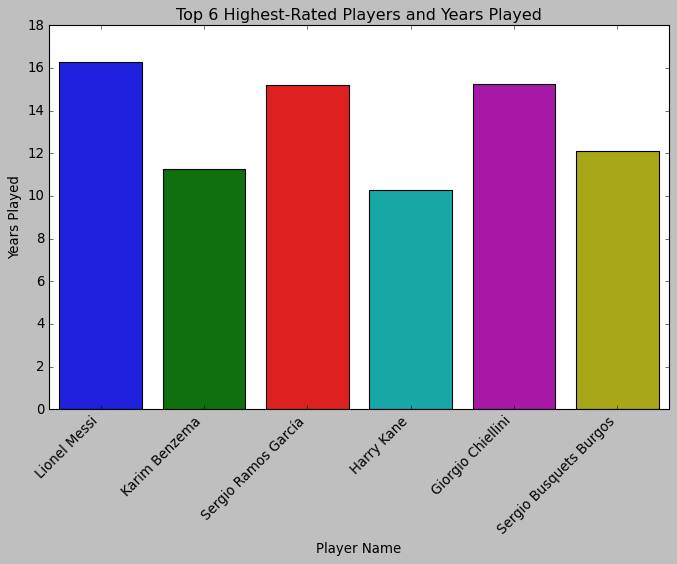

In [773]:
# Sort the DataFrame by '↓OVA' in descending order
more_than_decade_top_6_players = played_for_decade.sort_values('↓OVA', ascending=False)

# Select the top 6 players
more_than_decade_top_6_players = played_for_decade.head(6)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='LongName', y='Years Played', data=more_than_decade_top_6_players)
plt.title('Top 6 Highest-Rated Players and Years Played')
plt.xlabel('Player Name')
plt.ylabel('Years Played')
plt.xticks(rotation=45, ha='right')
plt.show()

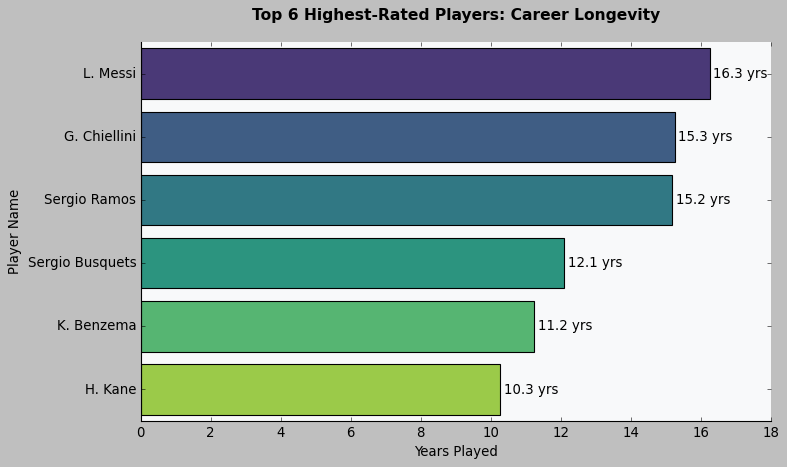

In [ ]:
more_than_decade_top_6_players = more_than_decade_top_6_players.sort_values('Years Played', ascending=False)


plt.style.use('grayscale')
plt.figure(figsize=(10, 6))

# Horizontal bar plot with customized appearance # Using a colorblind-friendly palette
ax = sns.barplot(x='Years Played', y='Name', data=more_than_decade_top_6_players, orient='h', palette='viridis', saturation=0.8)

plt.title('Top 6 Highest-Rated Players: Career Longevity', 
          pad=20, 
          fontsize=14, 
          fontweight='bold')
plt.xlabel('Years Played', fontsize=12)
plt.ylabel('Player Name', fontsize=12)

# Add value labels on the bars
for i in ax.containers:
    ax.bar_label(i, padding=3, fmt='%.1f yrs')


# ax.grid(axis='x', linestyle='--', alpha=0.7)

# Customize the background and borders
ax.set_facecolor('#f8f9fa')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.tight_layout()


plt.show()

Renamed column `↓OVA` to `OVR`

In [775]:
data = data.rename(columns={"↓OVA" : "OVR"})

**Data Cleaning and Normalization**

1. **Data Type Conversion:**
   - Converted the `Wage`, `Value`, and `Release Clause` columns from string to numeric format.
2. **Unit Conversion:**
   - Removed the Euro symbol (€) from the values.
   - Scaled values with "M" suffix to millions and "K" suffix to thousands.


In [776]:
data["Value"]

0        €103.5M
1           €63M
2          €120M
3          €129M
4          €132M
          ...   
18974      €100K
18975      €130K
18976      €120K
18977      €100K
18978      €100K
Name: Value, Length: 18979, dtype: object

In [777]:
data["Value"][~data["Value"].str.contains("M|K")]

289      €0
292      €0
369      €0
374      €0
375      €0
         ..
17220    €0
17343    €0
17659    €0
17661    €0
18205    €0
Name: Value, Length: 248, dtype: object

In [ ]:
def convert_valuations(value_str):
    """Extracts the numeric value and unit from a currency string.

    Args:
        value_str: The input string.

    Returns:
        The converted numeric value.
    """
    
    # Regex to match currency symbol, numeric value, and optional suffix
    match = re.search(r"[€$£]?(\d+(\.\d+)?)([MK]?)", value_str)
    
    if match:
        num = float(match.group(1))
        suffix = match.group(3)
        
        # Convert based on suffix
        if suffix == 'M':
            return num * 1000000
        elif suffix == 'K':
            return num * 1000
        else:
            return num
    else:
        return None


In [779]:
(data["Value"].apply(convert_valuations) == 0).value_counts()

Value
False    18731
True       248
Name: count, dtype: int64

In [780]:
data["Value"] = data["Value"].apply(convert_valuations)
data["Wage"] = data["Wage"].apply(convert_valuations)
data["Release Clause"] = data["Release Clause"].apply(convert_valuations)

In [781]:
data[["Value", "Wage", "Release Clause"]]

,Value,Wage,Release Clause
0,103500000.0,560000.0,138400000.0
1,63000000.0,220000.0,75900000.0
2,120000000.0,125000.0,159400000.0
3,129000000.0,370000.0,161000000.0
4,132000000.0,270000.0,166500000.0
...,...,...,...
18974,100000.0,1000.0,70000.0
18975,130000.0,500.0,165000.0
18976,120000.0,500.0,131000.0
18977,100000.0,2000.0,88000.0


In [782]:
data["Value"] = data["Value"].astype(int)
data["Wage"] = data["Wage"].astype(int)
data["Release Clause"] = data["Release Clause"].astype(int)

In [783]:
data[["Value", "Wage", "Release Clause"]]

,Value,Wage,Release Clause
0,103500000,560000,138400000
1,63000000,220000,75900000
2,120000000,125000,159400000
3,129000000,370000,161000000
4,132000000,270000,166500000
...,...,...,...
18974,100000,1000,70000
18975,130000,500,165000
18976,120000,500,131000
18977,100000,2000,88000


**Data Cleaning and Normalization**

* **Removed Unnecessary Characters:** Eliminated extraneous stars (`★`) from relevant columns.
* **Data Type Conversion:** Converted the affected columns from string to integer format, enabling numerical operations.

In [784]:
def find_columns_with_stars(df):
  """
  Finds columns in a DataFrame that contain star characters.

  Args:
    df: The DataFrame to search.

  Returns:
    A list of column names containing star characters.
  """

  columns_with_stars = []
  for col in df.columns:
    if df[col].astype(str).str.contains('★').any():
      columns_with_stars.append(col)
  return columns_with_stars

In [785]:
print("Columns containing newline characters:", find_columns_with_stars(data))

Columns containing newline characters: ['W/F', 'SM', 'IR']


In [786]:
had_stars = find_columns_with_stars(data)
data[find_columns_with_stars(data)]

,W/F,SM,IR
0,4 ★,4★,5 ★
1,4 ★,5★,5 ★
2,3 ★,1★,3 ★
3,5 ★,4★,4 ★
4,5 ★,5★,5 ★
...,...,...,...
18974,2 ★,2★,1 ★
18975,2 ★,2★,1 ★
18976,2 ★,2★,1 ★
18977,3 ★,2★,1 ★


In [787]:
for col in find_columns_with_stars(data):
    data[col] = data[col].astype(str).str.replace("★", '', regex=False)
    data[col] = data[col].astype(int)


In [788]:
data[had_stars]

,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
18974,2,2,1
18975,2,2,1
18976,2,2,1
18977,3,2,1


**Identifying Underpaid Players**

Using the data from the `Value` and `Wage` columns. 

Calculated a Value-to-Wage ratio for each player, then Computed Z-scores for both Value and Wage to understand how far each player is from the mean. 

All undervalued players where identified using the following criteria:
- Above average value (positive Value Z-score)
- Below average wage (negative Wage Z-score)
- High value-to-wage ratio (above median)

In [789]:
valuable_players = data[data["Value"] >= 30000000]

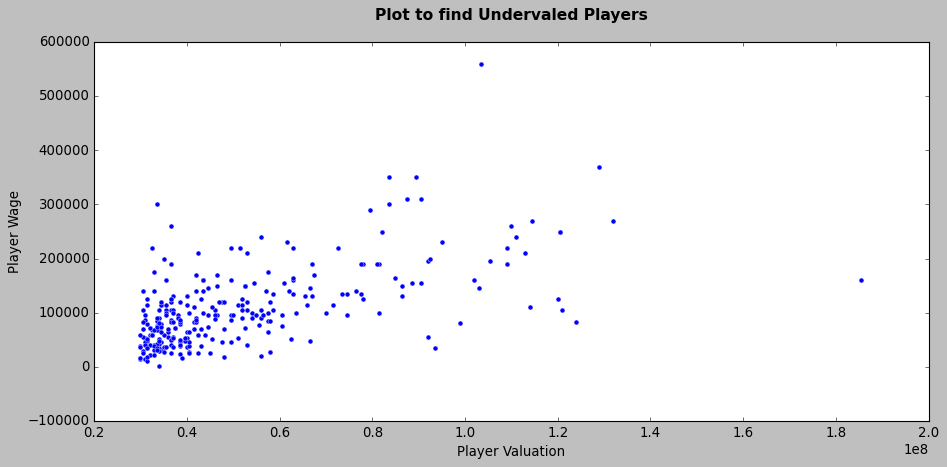

In [790]:
plt.figure(figsize=(12, 6))

gx = sns.scatterplot(x="Value", y="Wage", data=valuable_players)

plt.title("Plot to find Undervaled Players", 
          pad=20, 
          fontsize=14, 
          fontweight='bold')
plt.xlabel("Player Valuation", fontsize=12)
plt.ylabel("Player Wage", fontsize=12)

plt.tight_layout()

plt.show()


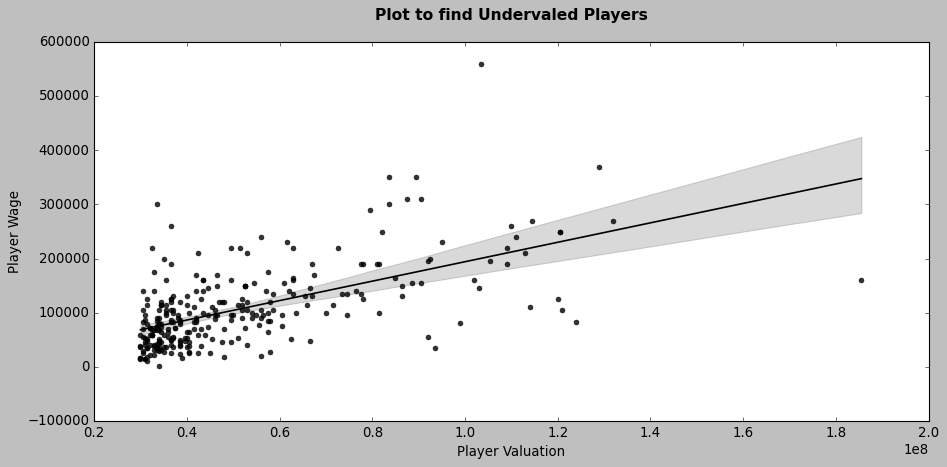

In [791]:
plt.figure(figsize=(12, 6))

gx = sns.regplot(x="Value", y="Wage", data=valuable_players)

plt.title("Plot to find Undervaled Players", 
          pad=20, 
          fontsize=14, 
          fontweight='bold')
plt.xlabel("Player Valuation", fontsize=12)
plt.ylabel("Player Wage", fontsize=12)

plt.tight_layout()

plt.show()


In [ ]:
def analyze_player_value(data):
    """
    Analyze player value vs wage to identify undervalued players
    """
    
    df = data[['ID','Name', 'Value', 'Wage', 'OVR']].copy()
    
    # Calculate value to wage ratio
    df['Value_to_Wage_Ratio'] = (df['Value'] / df['Wage']).round(2)
    
    # Calculate Z-scores for both Value and Wage
    df['Value_Z'] = (df['Value'] - df['Value'].mean()) / df['Value'].std()
    df['Wage_Z'] = (df['Wage'] - df['Wage'].mean()) / df['Wage'].std()
    
    # Defined undervalued players as those with:
    # - Above average value (positive Value_Z)
    # - Below average wage (negative Wage_Z)
    # - High value-to-wage ratio
    undervalued = df[
        (df['Value_Z'] > 0) & 
        (df['Wage_Z'] < 0) & 
        (df['Value_to_Wage_Ratio'] > df['Value_to_Wage_Ratio'].median())
    ].sort_values('Value_to_Wage_Ratio', ascending=False)
    
    
    
    plt.figure(figsize=(12, 8))

    # wage_jitter = df['Wage'] * (1 + np.random.normal(0, 0.02, len(df)))
    
    # Scatter plot
    plt.scatter(df["Wage"], df['Value'], alpha=0.5, c='gray', label='All Players')
    plt.scatter(undervalued['Wage'], undervalued['Value'], 
               c='red', label='Underpaid Players')
    
    # Labels for undervalued players
    # for idx, row in undervalued.head(10).iterrows():
    #     plt.annotate(row['Name'],
    #                 (row['Wage'], row['Value']),
    #                 xytext=(5, 5),
    #                 textcoords='offset points',
    #                 fontsize=8,
    #                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))
    
    plt.xlabel('Weekly Wage (€)', fontsize=11)
    plt.ylabel('Market Value (€)', fontsize=11)
    plt.title('Player Value vs Wage Analysis\nRed points indicate underpaid players', 
              pad=20, fontsize=12, fontweight="bold")
    plt.legend()
    
    # Log scale for better visualization
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True, alpha=0.3)
    
    stats_text = (
        f"Total Players: {len(df)}\n"
        f"Underpaid Players: {len(undervalued)}\n"
        f"Median Value/Wage Ratio: {df['Value_to_Wage_Ratio'].median():.1f}"
    )
    plt.text(0.02, 0.98, stats_text,
             transform=plt.gca().transAxes,
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()
    
    # Top undervalued players
    return undervalued[['ID','Name', 'OVR', 'Value', 'Wage', 'Value_to_Wage_Ratio']]

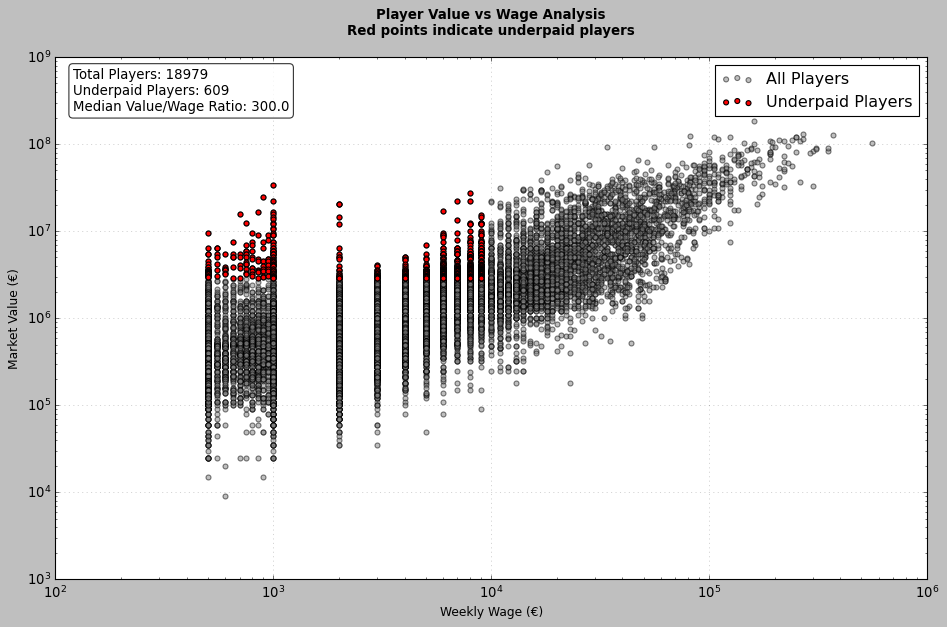

In [793]:
undervalued_players = analyze_player_value(data)

In [794]:
undervalued_players

,ID,Name,OVR,Value,Wage,Value_to_Wage_Ratio
373,244369,V. Tsygankov,80,34000000,1000,34000.00
372,241671,D. Livaković,80,24500000,900,27222.22
1354,244380,V. Mykolenko,76,16000000,700,22857.14
346,201119,Ismaily,81,22000000,1000,22000.00
697,244467,O. Kolář,78,16500000,850,19411.76
...,...,...,...,...,...,...
2649,200773,A. Wakaso,73,2900000,9000,322.22
5050,213697,P. McNair,70,2900000,9000,322.22
6445,245762,A. Kutucu,68,2900000,9000,322.22
5761,245084,M. Busi,69,2900000,9000,322.22


Added an `Underpaid` column to identify underpaid players.

In [795]:
underpaid_list = []
for index, row in data.iterrows():
    if row["ID"] in undervalued_players["ID"].values: 
            underpaid_list.append("Underpaid")
    else:
        underpaid_list.append("Not Underpaid")

data["Underpaid"] = underpaid_list

In [796]:
data["Underpaid"].value_counts()

Underpaid
Not Underpaid    18370
Underpaid          609
Name: count, dtype: int64

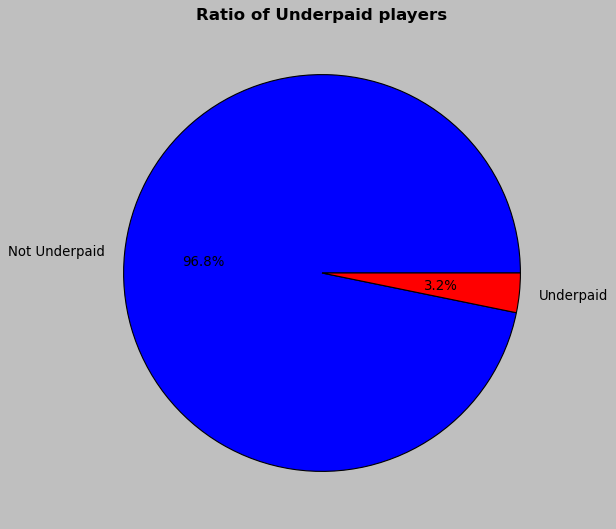

In [804]:

plt.figure(figsize=(8, 10))

data["Underpaid"].value_counts().plot(kind="pie", colors=["blue", "red"], autopct='%1.1f%%')
plt.ylabel("")
plt.title("Ratio of Underpaid players", fontsize=15, fontweight="bold")
plt.show()



In [805]:
data.to_excel("fifa21_transformed.xlsx", sheet_name="data")